In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Step 1: Load the Data
df = pd.read_csv('weather.csv')

In [3]:
# Step 2: Data Exploration
print(df.head())
print(df.info())
print(df.describe())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6 

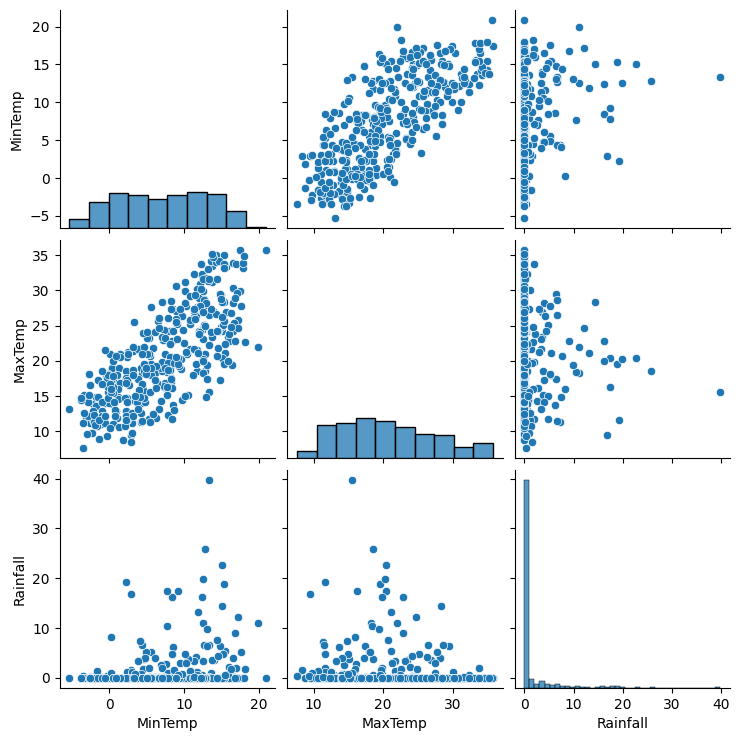

In [4]:
# Step 3: Data Visualization
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall']])
plt.show()

In [10]:
# Create a synthetic date column
df['Date'] = pd.date_range(start="2020-01-01", periods=len(df))

# Extract month
df['Month'] = df['Date'].dt.month

# Example: average MaxTemp per month
monthly_temp = df.groupby('Month')['MaxTemp'].mean()
print(monthly_temp)


Month
1     24.903226
2     24.993103
3     29.309677
4     24.680000
5     25.987097
6     19.500000
7     17.232258
8     14.445161
9     11.690000
10    12.841935
11    18.013333
12    23.025806
Name: MaxTemp, dtype: float64


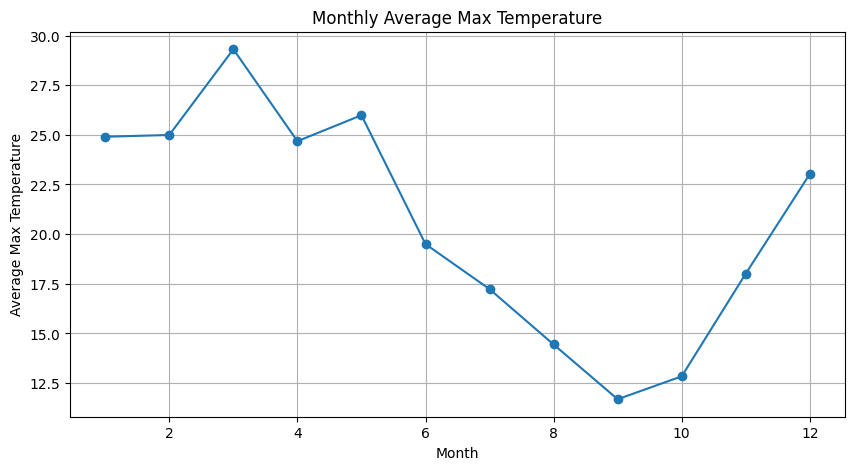

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_temp.index, monthly_temp.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Average Max Temperature')
plt.title('Monthly Average Max Temperature')
plt.grid(True)
plt.show()

In [14]:
# Step 7: Advanced Analysis (e.g., predict Rainfall)
# Prepare the data for prediction
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
# Make predictions and calculate the Mean Squared Error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 37.07684560058261


In [21]:
# Step 8: Conclusions and Insights (analyze each term)
# Example: Identify the highest and lowest rainfall months
highest_rainfall_month = monthly_temp.idxmax()
lowest_rainfall_month = monthly_temp.idxmin()
print(f'Highest rainfall month: {highest_rainfall_month}, Lowest rainfall month: {lowest_rainfall_month}')

Highest rainfall month: 3, Lowest rainfall month: 9


In [27]:
# Create a visualization of model performance
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Actual vs Predicted Rainfall')

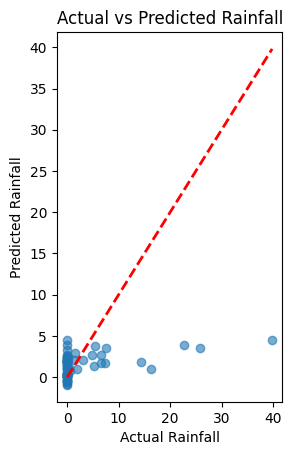

In [28]:
# Plot 1: Actual vs Predicted values
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Rainfall')
plt.ylabel('Predicted Rainfall')
plt.title('Actual vs Predicted Rainfall')

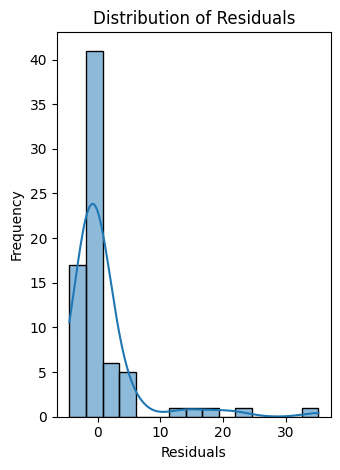

In [29]:
# Plot 2: Residuals distribution
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=15)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.tight_layout()
plt.show()